In [4]:
# https://github.com/Lorenzo2703/Advanced_Pitch.git

In [5]:
# pip3 install zenodo_get

In [6]:
# zenodo_get 10.5281/zenodo.4603870

In [7]:
import mido

def midi_to_notes(midi_file):
    mid = mido.MidiFile(midi_file)
    notes = []

    for i, track in enumerate(mid.tracks):
        print(f'Track {i}: {track.name}')
        for msg in track:
            if msg.type == 'note_on' and msg.velocity > 0:
                notes.append((msg.note, msg.time))

    return notes

def note_number_to_name(note_number):
    note_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    octave = note_number // 12 - 1
    note_name = note_names[note_number % 12]
    return f'{note_name}{octave}'

# Example usage
midi_file = 'mix_basic_pitch.mid'
notes = midi_to_notes(midi_file)

for note, time in notes:
    print(f'Note: {note_number_to_name(note)}, Time: {time}')


Track 0: 
Track 1: 
Note: E4, Time: 0
Note: G4, Time: 5
Note: E4, Time: 92
Note: D4, Time: 230
Note: B3, Time: 72
Note: A3, Time: 209
Note: F4, Time: 98
Note: A3, Time: 0
Note: D4, Time: 41
Note: D2, Time: 5
Note: D3, Time: 0
Note: D4, Time: 0
Note: D4, Time: 0
Note: A4, Time: 0
Note: D5, Time: 5
Note: D3, Time: 21
Note: F4, Time: 0
Note: D3, Time: 5
Note: D4, Time: 0
Note: D2, Time: 36
Note: A3, Time: 5
Note: D4, Time: 0
Note: D5, Time: 5
Note: D4, Time: 0
Note: A3, Time: 0
Note: D4, Time: 0
Note: D5, Time: 0
Note: D2, Time: 0
Note: D3, Time: 0
Note: A3, Time: 0
Note: D4, Time: 0
Note: E2, Time: 0
Note: A4, Time: 15
Note: G2, Time: 21
Note: G4, Time: 0
Note: G3, Time: 5
Note: B3, Time: 0
Note: D4, Time: 0
Note: F4, Time: 0
Note: F5, Time: 0
Note: G1, Time: 5
Note: D5, Time: 0
Note: B5, Time: 15
Note: G4, Time: 0
Note: D4, Time: 0
Note: E4, Time: 21
Note: B4, Time: 20
Note: D5, Time: 66
Note: G4, Time: 0
Note: D5, Time: 0
Note: D4, Time: 0
Note: G2, Time: 0
Note: G2, Time: 0
Note: G3, 

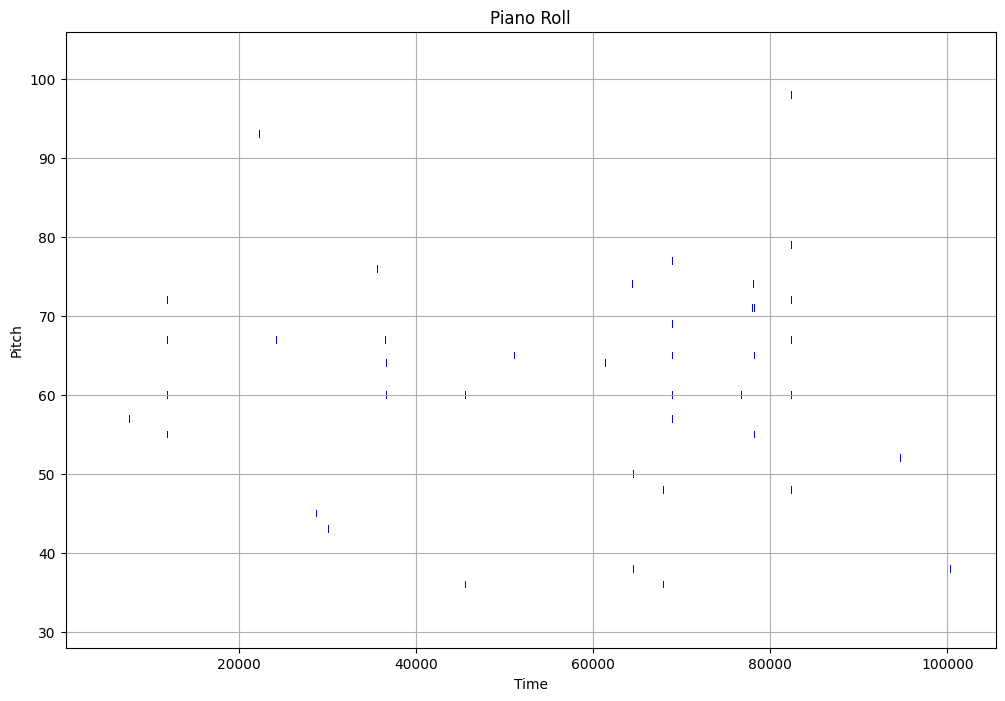

In [8]:
import mido
import matplotlib.pyplot as plt
import numpy as np

def midi_to_notes(midi_file):
    mid = mido.MidiFile(midi_file)
    notes = []

    current_time = 0
    for i, track in enumerate(mid.tracks):
        for msg in track:
            current_time += msg.time
            if msg.type == 'note_on' and msg.velocity > 0:
                notes.append((msg.note, current_time, msg.velocity))

    return notes

def plot_piano_roll(notes, filename):
    # Get the time and pitch range
    times = [note[1] for note in notes]
    pitches = [note[0] for note in notes]

    min_time = min(times)
    max_time = max(times)
    min_pitch = min(pitches)
    max_pitch = max(pitches)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot each note as a horizontal bar
    for note, start_time, velocity in notes:
        ax.broken_barh([(start_time, 1)], (note - 0.5, 1), facecolors='blue')

    # Set labels and title
    ax.set_xlabel('Time')
    ax.set_ylabel('Pitch')
    ax.set_title('Piano Roll')

    # Set axis limits
    ax.set_xlim(min_time, max_time)
    ax.set_ylim(min_pitch - 1, max_pitch + 1)

    # Show grid
    ax.grid(True)

    # Save the plot as an image file
    plt.savefig(filename)
    plt.show()

# Example usage
midi_file = 'mix_basic_pitch.mid'
notes = midi_to_notes(midi_file)

# Plot and save the piano roll
plot_piano_roll(notes, 'piano_roll.png')
